# Support Vector Machines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, make_moons
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.base import BaseEstimator

In [2]:
iris = load_iris()
data, target = iris['data'], iris['target']

X = data[:, 2:]
y = (target == 2).astype('int64')

In [3]:
svc = make_pipeline(StandardScaler(), LinearSVC(random_state= 42))

In [4]:
 svc.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [5]:
X_new = [[5.5, 1.7], [5.0, 1.5]]

In [6]:
svc.predict(X_new)

array([1, 0])

In [7]:
svc.decision_function(X_new)

array([ 0.66163411, -0.22036063])

## Nonlinear SVM Classification

In [8]:
X, y = make_moons(noise= 0.15, random_state= 42)

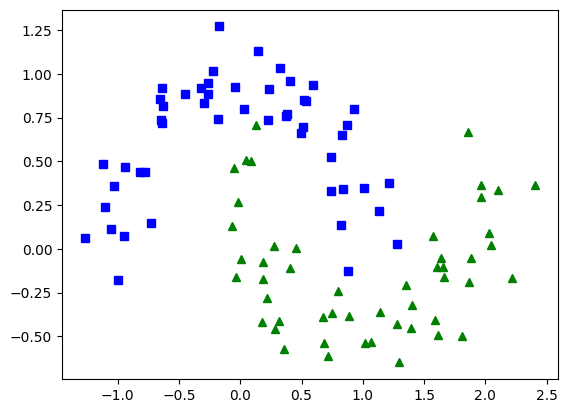

In [9]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')

In [10]:
poly_svm_clf = make_pipeline(
    PolynomialFeatures(degree= 3),
    StandardScaler(),
    LinearSVC(C= 10, random_state= 42)
)

In [11]:
poly_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

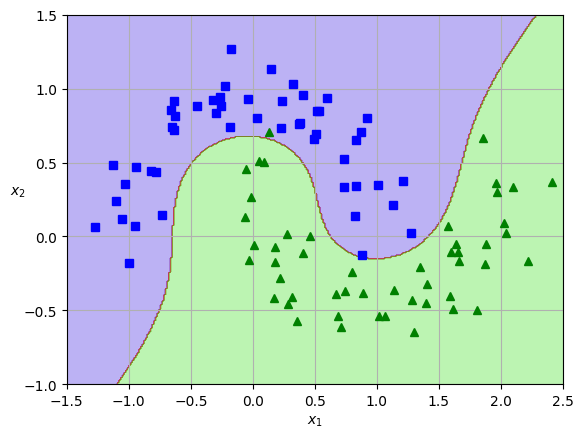

In [12]:
def plot_dataset(X: np.ndarray, y: np.ndarray, axes: list[float]) -> None:
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$', rotation=0)

def plot_predictions(clf: BaseEstimator, axes: list[float]) -> None:
    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap= plt.cm.brg, alpha= 0.3)
    
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel

In [13]:
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel= 'poly', degree= 3, coef0= 1, C= 5)
)

In [14]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

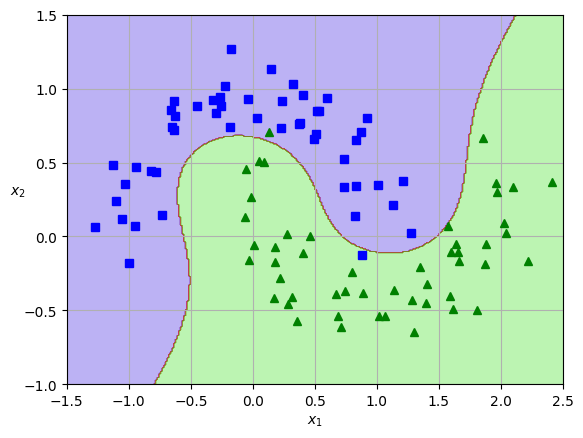

In [15]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

## Gaussian RBF Kernel

In [16]:
C1, C2 = 0.001, 1000
gamma1, gamma2 = 0.1, 5

In [17]:
hyperparams = (C1, gamma1), (C2, gamma1), (C1, gamma2), (C2, gamma2)

In [18]:
svm_clfs = []

for C, gamma in hyperparams:
    model = SVC(kernel= 'rbf', C= C, gamma= gamma)
    model.fit(X, y)
    svm_clfs.append(model)

In [19]:
svm_clfs

[SVC(C=0.001, gamma=0.1),
 SVC(C=1000, gamma=0.1),
 SVC(C=0.001, gamma=5),
 SVC(C=1000, gamma=5)]

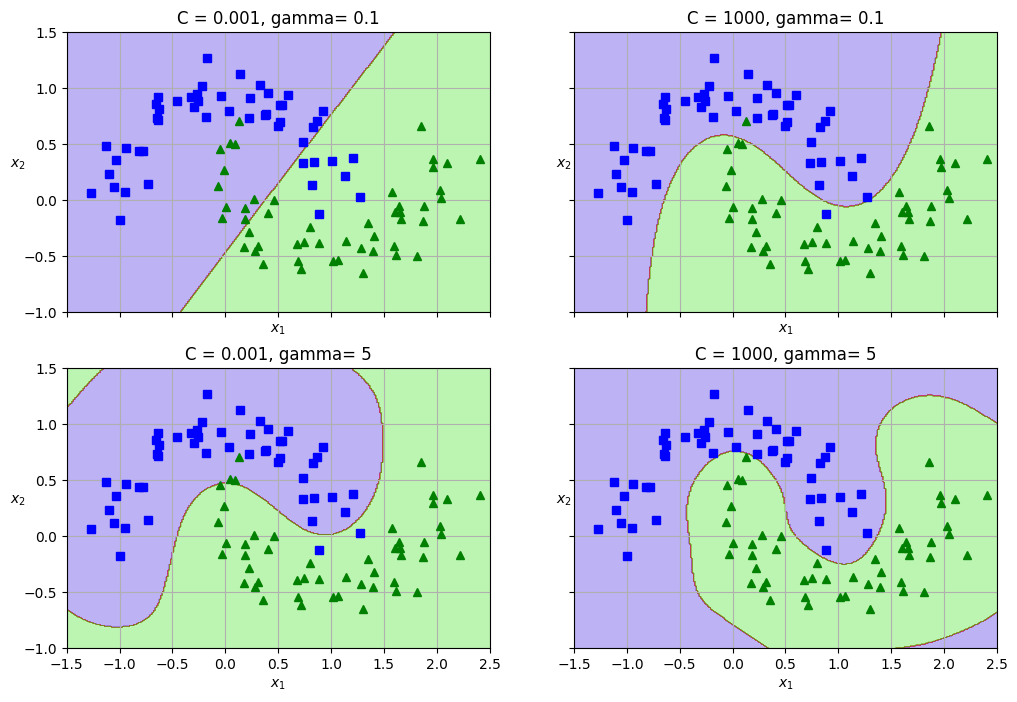

In [20]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, sharex= True, sharey= True, figsize= (12, 8))

for index, clf in enumerate(svm_clfs):
    plt.sca(axs[index // 2, index % 2])    # sca -> set current axis
    plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]) 
    C, gamma = hyperparams[index]
    plt.title(f'{C = }, {gamma= }')

## SVM Regression

In [21]:
# generating linear data
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 4 * X + np.random.randn(m, 1)

Text(0.5, 1.0, 'Random linear data')

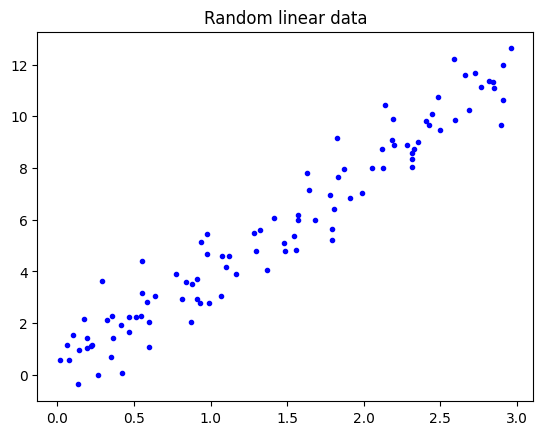

In [22]:
plt.plot(X, y, 'b.')
plt.title('Random linear data')

In [23]:
linear_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(epsilon= 0.5, random_state= 42)
)

In [24]:
linear_svr.fit(X.reshape(-1, 1), y.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [25]:
X_new = [[0], [3]]
y_pred = linear_svr.predict(X_new)

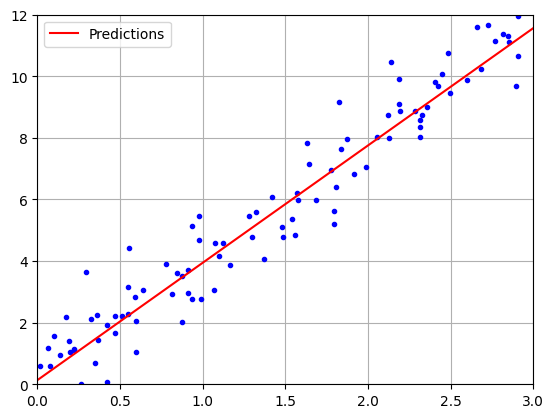

In [26]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-', label= 'Predictions')
plt.grid()
plt.legend()
plt.axis([0, 3, 0, 12])
plt.show()

### Polynomial Regression

In [27]:
np.random.seed(42)
X = np.random.randn(m, 1)
y = 3 + X ** 2 + X + np.random.randn(m, 1)

In [28]:
svm_poly_reg = make_pipeline(
    StandardScaler(), 
    SVR(kernel= 'poly', degree= 2, C= 0.01, epsilon= 0.1)
)

In [29]:
svm_poly_reg.fit(X, y.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])